In [21]:
import sys
import os
from pathlib import Path

# Add the project root to the Python path
current_path = Path(os.getcwd()).resolve()
project_root = None
# Iterate up from current_path to its parents
for parent_dir in [current_path] + list(current_path.parents):
    if (
        (parent_dir / ".git").is_dir()
        or (parent_dir / "pyproject.toml").is_file()
        or (parent_dir / "src").is_dir()
    ):
        project_root = parent_dir
        break

if project_root is None:
    # Fallback if no marker is found - assumes notebook is in a subdir of project root
    print(
        "Warning: Could not reliably find project root using markers (.git, pyproject.toml, src/)."
    )
    if current_path.name == "notebooks":
        project_root = current_path.parent
    else:
        project_root = current_path
        print(
            f"Warning: Using current working directory as potential project root: {project_root}"
        )

if project_root:
    project_root_str = str(project_root)
    if project_root_str not in sys.path:
        sys.path.insert(0, project_root_str)
        print(f"Project root '{project_root_str}' added to sys.path.")
    else:
        print(f"Project root '{project_root_str}' is already in sys.path.")
else:
    print("Error: Project root could not be determined. Imports from 'src' may fail.")

Project root '/workspaces/photo_tag_pipeline' is already in sys.path.


# Photo‑Tag Dataset EDA
Exploratory analysis for multi‑label COCO subset.

In [22]:
import fiftyone as fo
import importlib
import src.config
import src.data.loader

importlib.reload(src.config)
importlib.reload(src.data.loader)
from src.data.loader import prepare_dataset
from src.config import DEFAULT_CLASSES

# Prepare dataset will download, filter, split, export, and write metadata
views = prepare_dataset(classes=DEFAULT_CLASSES, max_samples=20, seed=42)

# Print the number of samples in each split
print("Dataset split sizes:")
for split_name, view in views.items():
    print(f"- {split_name}: {len(view)} samples")

# The views dictionary contains 'train', 'val', 'test' views.
# The underlying dataset can be accessed from any view, e.g., views['train']._dataset
# This dataset object contains all samples and the tags for splits.
dataset = views["train"]._dataset
print(f"\nTotal samples in the dataset: {len(dataset)}")
print(f"Dataset name in FiftyOne: {dataset.name}")

[INFO] Downloading splits ('train', 'validation', 'test') from coco-2017 (max 20 samples each)…


[INFO] Downloading split 'train' to '/root/fiftyone/coco-2017/train' if necessary


Found annotations at '/root/fiftyone/coco-2017/raw/instances_train2017.json'


[INFO] Found annotations at '/root/fiftyone/coco-2017/raw/instances_train2017.json'


Sufficient images already downloaded


[INFO] Sufficient images already downloaded


Existing download of split 'train' is sufficient


[INFO] Existing download of split 'train' is sufficient


[INFO] Downloading split 'validation' to '/root/fiftyone/coco-2017/validation' if necessary


Found annotations at '/root/fiftyone/coco-2017/raw/instances_val2017.json'


[INFO] Found annotations at '/root/fiftyone/coco-2017/raw/instances_val2017.json'


Sufficient images already downloaded


[INFO] Sufficient images already downloaded


Existing download of split 'validation' is sufficient


[INFO] Existing download of split 'validation' is sufficient


[INFO] Downloading split 'test' to '/root/fiftyone/coco-2017/test' if necessary


Test split is unlabeled; ignoring classes requirement


[WARNING] Test split is unlabeled; ignoring classes requirement


Found test info at '/root/fiftyone/coco-2017/raw/image_info_test2017.json'


[INFO] Found test info at '/root/fiftyone/coco-2017/raw/image_info_test2017.json'


Sufficient images already downloaded


[INFO] Sufficient images already downloaded


Existing download of split 'test' is sufficient


[INFO] Existing download of split 'test' is sufficient


Loading existing dataset 'coco-2017-train-validation-test-20'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use


[INFO] Loading existing dataset 'coco-2017-train-validation-test-20'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use
[INFO] Loaded 60 samples in total
[INFO] Filtering dataset to 8 target classes
[INFO] View retains 40 samples after label filtering
[INFO] Creating train/val/test tags (seed=42)…
[INFO] Clearing existing tag 'train' from 39 samples.
[INFO] Clearing existing tag 'val' from 3 samples.
[INFO] Clearing existing tag 'test' from 18 samples.
[INFO] Stratifying across 8 classes: ['bicycle', 'bus', 'car', 'cat', 'cell phone', 'dog', 'laptop', 'person']
[INFO] Distributing 20 remaining samples randomly...
[INFO] Final unique split ID counts - Train: 39, Val: 3, Test: 18
[INFO] Exporting train split → /workspaces/photo_tag_pipeline/src/data/coco/train (COCO) …


 100% |███████████████████| 39/39 [882.5ms elapsed, 0s remaining, 44.2 samples/s]      


[INFO]  100% |███████████████████| 39/39 [882.5ms elapsed, 0s remaining, 44.2 samples/s]      
[INFO] Exporting val split → /workspaces/photo_tag_pipeline/src/data/coco/val (COCO) …


 100% |█████████████████████| 3/3 [73.1ms elapsed, 0s remaining, 41.1 samples/s] 


[INFO]  100% |█████████████████████| 3/3 [73.1ms elapsed, 0s remaining, 41.1 samples/s] 
[INFO] Exporting test split → /workspaces/photo_tag_pipeline/src/data/coco/test (COCO) …


 100% |███████████████████| 18/18 [421.2ms elapsed, 0s remaining, 42.7 samples/s]      


[INFO]  100% |███████████████████| 18/18 [421.2ms elapsed, 0s remaining, 42.7 samples/s]      
[INFO] Metadata saved → /workspaces/photo_tag_pipeline/src/data/coco/dataset_metadata.json


Dataset split sizes:
- train: 39 samples
- val: 3 samples
- test: 18 samples

Total samples in the dataset: 60
Dataset name in FiftyOne: coco-2017-train-validation-test-20


In [23]:
# Launch the FiftyOne App to explore the entire dataset.
session = fo.launch_app(dataset)
# pass a specific view:
# session = fo.launch_app(views['train'])

Successfully loaded /workspaces/photo_tag_pipeline/src/data/coco/train/labels.json

COCO Dataset Analysis (from /workspaces/photo_tag_pipeline/src/data/coco/train/labels.json)
Dataset info: 2017/09/01
Number of categories: 40
Categories: ['backpack', 'baseball bat', 'baseball glove', 'bed', 'bench', 'bicycle', 'boat', 'bus', 'car', 'cell phone', 'chair', 'clock', 'couch', 'cup', 'dining table', 'dog', 'elephant', 'frisbee', 'handbag', 'horse', 'keyboard', 'kite', 'laptop', 'microwave', 'mouse', 'person', 'potted plant', 'remote', 'sandwich', 'sheep', 'skateboard', 'skis', 'snowboard', 'sports ball', 'tennis racket', 'tie', 'traffic light', 'truck', 'tv', 'umbrella']

Valid Images Analysis
Number of valid images with filename: 39
Sample of valid images:
ID: 1, Filename: 000000295537.jpg, Size: 640x480
ID: 2, Filename: 000000519685.jpg, Size: 500x333
ID: 3, Filename: 000000020849.jpg, Size: 640x541
ID: 4, Filename: 000000277950.jpg, Size: 500x374
ID: 5, Filename: 000000046149.jpg, Size: 

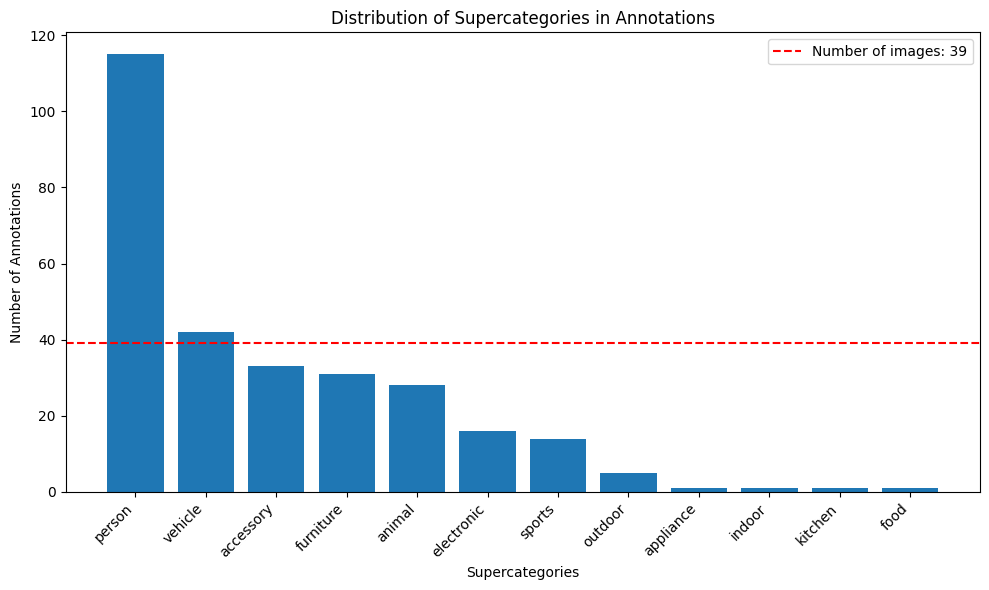

In [24]:
import json
from collections import Counter
import matplotlib.pyplot as plt
import importlib
import src.config

importlib.reload(src.config)

# Define the path to the training annotations file
train_ann_file_path = src.config.DATASET_ROOT / "train" / "labels.json"

# Load COCO data from the training split's exported labels.json
coco_data = {}  # Initialize to empty dict

with open(train_ann_file_path, "r") as f:
    coco_data = json.load(f)
print(f"Successfully loaded {train_ann_file_path}")

# Basic dataset information
print(f"\nCOCO Dataset Analysis (from {train_ann_file_path})")
print(f"===========================")
# Check if coco_data was loaded successfully before trying to access its keys
if coco_data:
    print(
        f"Dataset info: {coco_data.get('info', {}).get('date_created', 'Not specified')}"
    )
    print(f"Number of categories: {len(coco_data.get('categories', []))}")
    print(f"Categories: {[cat['name'] for cat in coco_data.get('categories', [])]}")

    # Get valid images (with id and file_name)
    valid_images = []
    for img in coco_data.get("images", []):
        if "file_name" in img and "id" in img:
            valid_images.append(
                (img["id"], img["file_name"], img.get("height"), img.get("width"))
            )

    print(f"\nValid Images Analysis")
    print(f"===========================")
    print(f"Number of valid images with filename: {len(valid_images)}")
    if valid_images:
        print("Sample of valid images:")
        for i, (img_id, filename, height, width) in enumerate(valid_images[:5]):
            print(f"ID: {img_id}, Filename: {filename}, Size: {width}x{height}")

    # Analyze image dimensions if available
    heights = [
        h
        for _, _, h, _ in valid_images
        if h is not None and isinstance(h, (int, float))
    ]
    widths = [
        w
        for _, _, _, w in valid_images
        if w is not None and isinstance(w, (int, float))
    ]

    if heights and widths:
        print(f"\nImage Dimensions Statistics:")
        print(
            f"Height - Min: {min(heights)}, Max: {max(heights)}, Avg: {sum(heights)/len(heights):.1f}"
        )
        print(
            f"Width  - Min: {min(widths)}, Max: {max(widths)}, Avg: {sum(widths)/len(widths):.1f}"
        )

    # Count supercategories in annotations
    print(f"\nAnnotations Analysis")
    print(f"===========================")
    if "annotations" in coco_data:
        annotations = coco_data["annotations"]
        print(f"Number of annotations: {len(annotations)}")

        # Count by supercategory
        supercategories = [
            ann.get("supercategory") for ann in annotations if "supercategory" in ann
        ]
        if supercategories:  # Check if list is not empty
            supercategory_counts = Counter(supercategories)

            print("\nSupercategory distribution:")
            for cat, count in supercategory_counts.most_common():
                print(
                    f"{cat}: {count} annotations ({count/len(supercategories)*100:.1f}%)"
                )

            if supercategory_counts:
                # Plot supercategory distribution
                plt.figure(figsize=(10, 6))
                cats, counts = zip(*supercategory_counts.most_common())
                plt.bar(cats, counts)
                plt.xlabel("Supercategories")
                # Only plot horizontal line if valid_images is not empty
                if valid_images:
                    plt.axhline(
                        y=len(valid_images),
                        color="r",
                        linestyle="--",
                        label=f"Number of images: {len(valid_images)}",
                    )
                    plt.legend()
                plt.ylabel("Number of Annotations")
                plt.title("Distribution of Supercategories in Annotations")
                plt.xticks(rotation=45, ha="right")
                plt.tight_layout()
                plt.show()
        else:
            print("No supercategory information found in annotations.")
else:
    print("Skipping COCO data analysis as coco_data could not be loaded.")

In [25]:
import os
from IPython.display import HTML
from IPython import get_ipython

# Get current notebook name
try:
    # Try to get the notebook name using IPython's special variable
    notebook_path = (
        get_ipython().kernel.shell.user_ns["__vsc_ipynb_file__"]
        if "__vsc_ipynb_file__" in get_ipython().kernel.shell.user_ns
        else None
    )
    if not notebook_path:
        notebook_path = get_ipython().kernel.shell.user_ns.get(
            "__notebook_source__", ""
        )
    notebook_name = os.path.basename(notebook_path) if notebook_path else ""
except:
    notebook_name = ""

# Check if the notebook name was successfully determined
if notebook_name == "":
    # Fallback method if automatic detection fails
    notebook_name = input("Enter notebook filename (with .ipynb extension): ")

# Use nbconvert to export the notebook without input cells tagged with "remove"
# Ensure the assets directory exists
assets_dir = "../assets"
os.makedirs(assets_dir, exist_ok=True)
output_html = os.path.join(
    assets_dir, os.path.splitext(os.path.basename(notebook_name))[0] + "_export.html"
)
!jupyter nbconvert --to html --TagRemovePreprocessor.remove_cell_tags='{"remove"}' "{notebook_name}" --output "{output_html}"

# Display a success message
display(
    HTML(
        f"<div style=padding:10px;'>"
        f"<h3>Export complete!</h3>"
        f"<p>Notebook <b>{notebook_name}</b> has been exported to HTML.</p>"
        f"</div>"
    )
)

[NbConvertApp] Converting notebook 01_dataset_eda.ipynb to html
[NbConvertApp] Writing 277663 bytes to ../assets/01_dataset_eda_export.html
